# KKUI CIT Course - Neural networks - Week_02 - Linear regression (basic)


In [53]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Prepair data

In [65]:
# Generate synthetic regression data using scikit-learn's make_regression function
# Parameters:
#   - n_samples: Number of samples to generate
#   - n_features: Number of features (independent variables) in the data
#   - noise: Standard deviation of the Gaussian noise added to the data
#   - random_state: Seed for random number generation to ensure reproducibility
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=50,  tail_strength=0.9, random_state=4)

# Cast the generated NumPy arrays to float32 data type and convert them into PyTorch tensors - data from source are in double type, pytorch require float
# Convert features (X) and target variable (y) to PyTorch tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# Reshape the target variable tensor to ensure compatibility with model training
# Reshaping is necessary because PyTorch expects the target variable to have dimensions (n_samples, n_outputs)
# In this case, since we have only one output, we reshape it to (n_samples, 1)
y = y.view(y.shape[0], 1)


In [66]:
X.shape

torch.Size([100, 1])

## Model

PyTorch [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) for nn.Linear

In [67]:
# Get the number of samples and number of features in the dataset
n_samples, n_features = X.shape

# Define the input size of the model, which is equal to the number of features in the dataset
input_size = n_features

# Define the output size of the model, which is 1 for linear regression since we are predicting a single continuous value
output_size = 1

In [68]:
# Define the linear regression model class using PyTorch's nn.Module
# Linear model f = wx + b
class MyModel(nn.Module):
    def __init__(self, n_input_features):
        # Call the constructor of the parent class (nn.Module)
        super(MyModel, self).__init__()

        # Define the linear layer of the model using nn.Linear
        # Parameters:
        #   - in_features: Number of input features to the linear layer, which is equal to n_input_features
        #   - out_features: Number of output features of the linear layer, which is 1 for linear regression
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        # Define the forward pass of the model
        # This function takes input data 'x' and computes the predicted output 'y_pred'

        # Perform the linear transformation on the input data using the defined linear layer
        # The linear layer automatically applies the weights (w) and bias (b) to the input data
        # It computes the dot product of input features and weights, and adds the bias term
        y_pred = self.linear(x)

        # Return the predicted output
        return y_pred

# Create an instance of the MyModel class, passing the input_size as the number of input features
model = MyModel(input_size)


## Loss and optimizer
This code segment sets up the loss function and optimizer for training the linear regression model. The Mean Squared Error (MSE) loss function is commonly used for regression tasks, and Stochastic Gradient Descent (SGD) optimizer is chosen with a specified learning rate. Detailed comments explain the purpose and parameters of both the loss function and optimizer.

In [69]:
# Set the learning rate for the optimizer
learning_rate = 0.01

# Define the loss function for the model, which is Mean Squared Error (MSE) loss
# The criterion will be used to compute the loss between the model predictions and the actual target values
criterion = nn.MSELoss()

# Define the optimizer for updating the model parameters during training
# Stochastic Gradient Descent (SGD) optimizer is used with the specified learning rate
# Parameters:
#   - model.parameters(): Provides the parameters (weights and biases) of the model to be optimized
#   - lr: Learning rate, which determines the step size of parameter updates during optimization
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## Training loop

In [70]:
# Define the number of epochs for training
num_epochs = 100

# Loop over the specified number of epochs for training the model
for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing input data (X) through the model
    y_predicted = model(X)

    # Compute the loss using the defined loss function (Mean Squared Error)
    loss = criterion(y_predicted, y)

    # Backward pass: compute gradient of the loss with respect to model parameters
    # This calculates the gradients of the loss function w.r.t. the parameters (weights and biases)
    loss.backward()

    # Update model parameters using the optimizer
    # The optimizer adjusts the model parameters based on the computed gradients and the learning rate
    optimizer.step()

    # Zero the gradients for the next iteration to prevent accumulation
    optimizer.zero_grad()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# After training, detach the predicted values from the computational graph and convert them to NumPy array
predicted = model(X).detach().numpy()

epoch: 10, loss = 5416.6606
epoch: 20, loss = 4271.5518
epoch: 30, loss = 3490.6982
epoch: 40, loss = 2958.1213
epoch: 50, loss = 2594.8057
epoch: 60, loss = 2346.9092
epoch: 70, loss = 2177.7319
epoch: 80, loss = 2062.2549
epoch: 90, loss = 1983.4183
epoch: 100, loss = 1929.5861


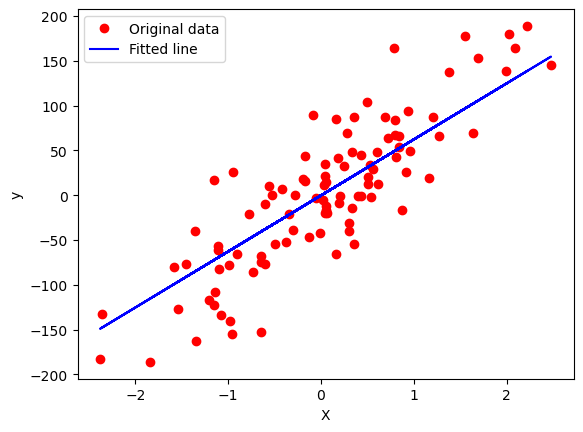

In [71]:
# Plot the original data points (red circles) and the predicted regression line (blue line)
plt.plot(X_numpy, y_numpy, 'ro', label='Original data')
plt.plot(X_numpy, predicted, 'b', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [72]:
# Accessing parameters
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[62.5532]], requires_grad=True)
Parameter containing:
tensor([-0.1544], requires_grad=True)


## Testing

In [73]:
model(torch.tensor([5.0]))

tensor([312.6118], grad_fn=<AddBackward0>)

In [74]:
# Generate some test data points to evaluate the trained model
test_x = np.array([[3], [3.45], [4.20]])

# Convert the test data to PyTorch tensor with the appropriate data type
test_x = torch.from_numpy(test_x.astype(np.float32))

# Get the model predictions for the test data
test_y = model(test_x)

# Detach the test predictions from the computational graph and convert them to NumPy array
test_y = test_y.detach().numpy()

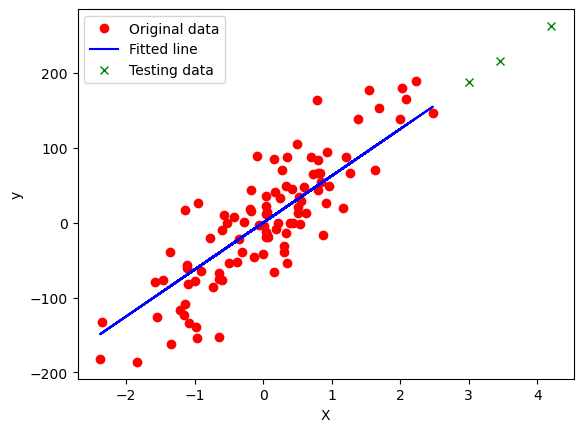

In [75]:
# Plot the original data points (red circles), the predicted regression line (blue line), and additional testing values (green crosses)
plt.plot(X_numpy, y_numpy, 'ro', label='Original data')  # Plot original data points
plt.plot(X_numpy, predicted, 'b', label='Fitted line')    # Plot fitted regression line

# Add the testing data points along with their predicted values (marked with green crosses)
plt.plot(test_x, test_y, 'gx', label='Testing data')  # Plot testing data points

# Set labels for the x and y axes
plt.xlabel('X')
plt.ylabel('y')

# Display legend
plt.legend()

# Show the plot
plt.show()